In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
powers=1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4
numbers=np.array(range(1,101))

In [2]:
wine=datasets.load_wine()

In [3]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [4]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [9]:
X,y=df,wine.target

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=5,stratify=y)

In [11]:
lin_model=LinearRegression()

In [12]:
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lin_model.predict(X_test)-Y_test

array([-0.15184753,  0.26141719, -0.06229205, -0.08709562,  0.02463084,
        0.20078906,  0.16343215,  0.05026428, -0.0117312 , -0.13830224,
       -0.46201669,  0.21242791, -0.176942  , -0.26589445,  0.14357291,
       -0.35811815,  0.26476801,  0.0325548 , -0.17668377, -0.16315798,
       -0.42331477, -0.44132777, -0.32944327, -0.39157886, -0.52219251,
        0.11908809,  0.09430752, -0.08931526,  0.23018172,  0.27015463,
       -0.18501013,  0.33584984, -0.06125196, -0.56712468,  0.15068348,
        0.01997581,  0.10700566,  0.3008414 ,  0.17673847,  0.12561565,
        0.11975562, -0.30912594,  0.09587214,  0.26751216,  0.02498113])

In [14]:
lin_model.score(X_test,Y_test)

0.8980581952339941

In [15]:
#----------------------------------------------------------------------#
# now applying cross valiidation score

In [16]:
X_shuffle,y_shuffle=shuffle(X,y,random_state=5)
X_scaled=StandardScaler().fit_transform(X_shuffle)

In [17]:
scores=np.mean(cross_val_score(LinearRegression(),X_scaled,y_shuffle,cv=5))
print(scores)

0.8587320517636028


In [18]:
# now applying ridge()

In [19]:
scores=np.mean(cross_val_score(Ridge(),X_scaled,y_shuffle,cv=5,n_jobs=-1))
print(scores)

0.8614395662578811


In [20]:
# to choose best alpha

In [21]:
params={'alpha': powers}
model=GridSearchCV(Ridge(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
model.best_params_

{'alpha': 10.0}

In [23]:
model.best_score_

0.8687540610799341

In [24]:
params={'alpha': powers}
params={'alpha': numbers*1}
model=GridSearchCV(Ridge(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1,   2, ...,  99, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
model.best_params_

{'alpha': 11}

In [26]:
model.best_score_

0.8687573129130696

In [27]:
# now using Lasso

In [28]:
scores=np.mean(cross_val_score(Lasso(),X_scaled,y_shuffle,cv=5,n_jobs=-1))
print(scores)

-0.03841549996985538


In [29]:
params={'alpha': powers}
model=GridSearchCV(Lasso(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
model.best_params_

{'alpha': 0.01}

In [31]:
model.best_score_

0.866480408037184

In [32]:
params={'alpha': powers}
params={'alpha': numbers*0.001}
model=GridSearchCV(Lasso(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([0.001, 0.002, ..., 0.099, 0.1  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
model.best_params_

{'alpha': 0.016}

In [34]:
model.best_score_

0.8687876709477639

In [35]:
#-----------------------------------------------------------------------------------------#
# now using Logistic regression

In [36]:
scores=np.mean(cross_val_score(LogisticRegression(),X_scaled,y_shuffle,cv=5,n_jobs=-1))
print(scores)

0.9776190476190475


In [37]:
params={'C': powers}
model=GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
model.best_params_

{'C': 0.1}

In [39]:
model.best_score_

0.9831460674157303

In [40]:
params={'C': powers}
params={'C': numbers*0.01 }
model=GridSearchCV(LogisticRegression(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0.01, 0.02, ..., 0.99, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
model.best_params_

{'C': 0.16}

In [42]:
model.best_score_

0.9887640449438202

In [43]:
#---------------------------------------------------------------------#
# now applyinng KNN

In [44]:
scores=np.mean(cross_val_score(KNeighborsClassifier(),X_scaled,y_shuffle,cv=5,n_jobs=-1))
print(scores)

0.955052110934464


In [45]:
params={'n_neighbors': range(1,21),'weights':['uniform','distance'],'p': [1,2,3]}
model=GridSearchCV(KNeighborsClassifier(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
model.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [47]:
model.best_score_

0.9831460674157303

In [48]:
params={'n_neighbors': range(1,21),'weights':['uniform','distance'],'p': [1,2,3]}
model=GridSearchCV(KNeighborsRegressor(),params,cv=5,n_jobs=-1)
model.fit(X_scaled,y_shuffle)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
model.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [50]:
model.best_score_

0.9627847594412862

In [51]:
# it means logistic regression is best for this data , so making pipeline here

In [52]:
pipeline=make_pipeline(StandardScaler(),LogisticRegression())
params={'logisticregression__C':powers,'logisticregression__penalty':['l1','l2']}
model=GridSearchCV(pipeline,params,cv=5,n_jobs=-1)
model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logisticregression__C': (0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0), 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
model.best_params_

{'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}

In [54]:
model.best_score_

0.9924812030075187

In [55]:
pipeline=make_pipeline(StandardScaler(),PCA(),LogisticRegression())
params={'logisticregression__C':powers,'logisticregression__penalty':['l1','l2'],'pca__n_components':range(1,14)}
params={'logisticregression__C':numbers*1,'logisticregression__penalty':['l1','l2'],'pca__n_components':range(1,14)}
model=GridSearchCV(pipeline,params,cv=5,n_jobs=-1)
model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logisticregression__C': array([  1,   2, ...,  99, 100]), 'logisticregression__penalty': ['l1', 'l2'], 'pca__n_components': range(1, 14)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
model.best_params_

{'logisticregression__C': 9,
 'logisticregression__penalty': 'l2',
 'pca__n_components': 13}

In [57]:
model.best_score_

0.9924812030075187

In [58]:
model.predict(X_test)-Y_test

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [59]:
# To see which columns are important in wine data

In [60]:
pca=PCA()

In [61]:
X_pca=pca.fit_transform(X)

In [62]:
pca.explained_variance_

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

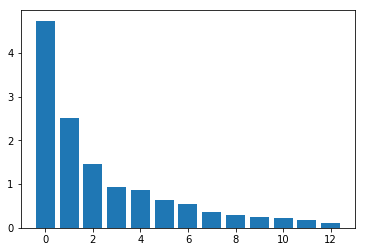

In [63]:

X_scaled=StandardScaler().fit_transform(X)
pca.fit_transform(X_scaled)
plt.bar(range(len(pca.explained_variance_)),pca.explained_variance_)
plt.show()